In [1]:
from IPython.display import display, HTML
display(HTML("""
<style>
div.container{width:86% !important;}
div.cell.code_cell.rendered{width:100%;}
div.CodeMirror {font family: Consolas; font-size:12pt;}
div.output {font-size:12pt; font-weight:bold;}
div.input {font-family: Consolas; font-size:12pt;}
div.prompt {min-width:70px;}
div#toc-wrapper{padding top:120px;}
div.text_cell_render ul li {font-size:12pt;padding:5px;}
table.dataframe{font-size:12px;}
</style>
"""))

<b><font color="red" size="6"> 11장. 데이터프레임과 시리즈(Pandas) </font></b>
- pip install pandas / conda install pandas (아나콘다 프롬프트)
# 1절. 판다스 패키지
- 데이터 분석을 위해 반드시 알아야 할 패키지. 넘파이 기반으로 다른 많은 라이브러리와 잘 통합되도록 설계
- 1차원 구조를 갖는 시리즈, 2차원 구조를 갖는 데이터프레임(excel의 스프레드시트)을 제공
- 판다스 장점 : 파일io, 부분 데이터 추출, 크기변경, 데이터 분할, 병합, 정렬, 결측치 처리, 데이터분할, 
                피벗과 언피벗(와이드포멧과 롱포멧)에 용이

- [Pandas API reference](https://pandas.pydata.org/docs/reference/index.html)
- [Pandas docs](https://pandas.pydata.org/docs/)

In [1]:
import pandas as pd
pd.__version__

'2.1.4'

In [4]:
data = pd.read_csv('data/ch09_member4.csv', encoding='utf-8') # encoding = 'utf-8' 기본값
display(data)
type(data)

,name,age,email,address
0,홍길동,22,a@a.com,신림동
1,신길동,32,b@a.com,신길동
2,김길동,42,c@a.com,신림동


pandas.core.frame.DataFrame

In [5]:
data = pd.read_csv('data/ch09_member1.csv', encoding='utf-8', header=None)
display(data)
type(data)

,0,1,2,3
0,홍길동,20,kildong@hong.com,서울시 관악구
1,김길동,40,kimdong@hong.com,서울시 영등포구
2,신길동,30,sindong@hong.com,서울시 동작구


pandas.core.frame.DataFrame

In [7]:
data = pd.read_csv('data/ch09_member1.csv', encoding='utf-8', header=None, names=['name','age','email','address'])
display(data)
type(data)

,name,age,email,address
0,홍길동,20,kildong@hong.com,서울시 관악구
1,김길동,40,kimdong@hong.com,서울시 영등포구
2,신길동,30,sindong@hong.com,서울시 동작구


pandas.core.frame.DataFrame

In [9]:
data = pd.read_csv('data/ch09_member1.csv', encoding='utf-8', header=None, names=['name','age','email','address'])
data.head(2) # 최초 상위 2줄

,name,age,email,address
0,홍길동,20,kildong@hong.com,서울시 관악구
1,김길동,40,kimdong@hong.com,서울시 영등포구


In [14]:
data = pd.read_json('data/ch09_member.json', encoding='utf-8')
display(data)

,name,age,email,address
0,홍길동,20,kildong@hong.com,서울
1,김길동,30,giadong@hong.com,인천


In [15]:
iris = pd.read_hdf('data/ch09_iris.hdf5', key='iris', encoding='utf-8')
iris.head() # 상위 5개

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


# 2절. 데이터 프레임 만들기
## 2.1 딕셔너리를 이용해서 데이터프레임 만들기

#### 딕셔너리를 데이터프레임으로

In [16]:
import pandas as pd
d = {'kor':[100,90], 'mat':[95,99]} # 딕셔너리를 데이터프레임으로
df = pd.DataFrame(data=d)
df

,kor,mat
0,100,95
1,90,99


In [17]:
df.to_dict() # 데이터 프레임을 딕셔너리로 변환

{'kor': {0: 100, 1: 90}, 'mat': {0: 95, 1: 99}}

In [18]:
df.to_numpy()

array([[100,  95],
       [ 90,  99]], dtype=int64)

#### 딕셔너리 리스트를 데이터프레임으로

In [23]:
# 딕셔너리 리스트를 데이터프레임으로
d = [{'kor':100, 'mat':95}, {'kor':90., 'mat':99}]
df = pd.DataFrame(d) # data = 생략가능
df

,kor,mat
0,100.0,95
1,90.0,99


In [25]:
df.dtypes # 얘는 거의 안씀

kor    float64
mat      int64
dtype: object

In [26]:
df.info() # ★ 얘를 주로 많이 씀

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   kor     2 non-null      float64
 1   mat     2 non-null      int64  
dtypes: float64(1), int64(1)
memory usage: 160.0 bytes


#### 결측치가 있는 딕셔너리

In [27]:
# 결측치가 있는 딕셔너리
d = [{'kor':100, 'mat':100}, {'kor':20, 'mat':91}, {'kor':93}]
df = pd.DataFrame(d)
df

,kor,mat
0,100,100.0
1,20,91.0
2,93,NaN


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   kor     3 non-null      int64  
 1   mat     2 non-null      float64
dtypes: float64(1), int64(1)
memory usage: 176.0 bytes


In [31]:
# 결측치가 있는 딕셔너리
d = [{'kor':100, 'mat':100}, {'kor':20, 'mat':91}, {'kor':93, 'eng':100}]
df = pd.DataFrame(d) # 결측치는 실수형(float64). 정수형변환 불가(결측치대체를 한후 정수형변환)
df

,kor,mat,eng
0,100,100.0,NaN
1,20,91.0,NaN
2,93,NaN,100.0


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   kor     3 non-null      int64  
 1   mat     2 non-null      float64
 2   math    1 non-null      float64
dtypes: float64(2), int64(1)
memory usage: 200.0 bytes


## 2.2 리스트를 이용해서 데이터 프레임 만들기

In [34]:
title = ['책1','책2','책3']
price = [15000, 18000, 10000]
df = pd.DataFrame({'title':title,'price':price})
df

,title,price
0,책1,15000
1,책2,18000
2,책3,10000


In [35]:
import numpy as np
np.c_[title, price]

array([['책1', '15000'],
       ['책2', '18000'],
       ['책3', '10000']], dtype='<U11')

In [42]:
df=pd.DataFrame(np.c_[title, price], columns=['책이름','가격'])
df

,책이름,가격
0,책1,15000
1,책2,18000
2,책3,10000


In [39]:
l = [['책1',15000],
     ['책2',18000],
     ['책3',10000]]
df = pd.DataFrame(l, columns=['책이름','가격'])
df

,책이름,가격
0,책1,15000
1,책2,18000
2,책3,10000


## 2.3 pd.read_csv

In [57]:
import pandas as pd

In [46]:
%ls C:\ai_x\download\shareData\상가정보_20250331\ # !dir ! 를 앞에 쓰면 cmd 명령어, %ls %는 파워쉘 명령어(매직명령어)

 C 드라이브의 볼륨에는 이름이 없습니다.
 볼륨 일련 번호: 3664-591E

 C:\ai_x\download\shareData\상가정보_20250331 디렉터리

2025-04-28  오전 09:33    <DIR>          .
2025-04-28  오전 09:33    <DIR>          ..
2025-04-27  오후 11:07             1,011 [필독]파일열람방법.txt
2025-04-27  오후 11:07        61,227,944 소상공인시장진흥공단_상가(상권)정보_강원_202503.csv
2025-04-27  오후 11:07       356,572,082 소상공인시장진흥공단_상가(상권)정보_경기_202503.csv
2025-04-27  오후 11:07        93,472,559 소상공인시장진흥공단_상가(상권)정보_경남_202503.csv
2025-04-27  오후 11:07        76,425,275 소상공인시장진흥공단_상가(상권)정보_경북_202503.csv
2025-04-27  오후 11:07        40,070,868 소상공인시장진흥공단_상가(상권)정보_광주_202503.csv
2025-04-27  오후 11:07        61,715,005 소상공인시장진흥공단_상가(상권)정보_대구_202503.csv
2025-04-27  오후 11:07        41,491,092 소상공인시장진흥공단_상가(상권)정보_대전_202503.csv
2025-04-27  오후 11:07        84,550,600 소상공인시장진흥공단_상가(상권)정보_부산_202503.csv
2025-04-27  오후 11:07       294,549,483 소상공인시장진흥공단_상가(상권)정보_서울_202503.csv
2025-04-27  오후 11:07         9,303,432 소상공인시장진흥공단_상가(상권)정보_세종_202503.csv
2025-04-27  오후 11:07        28,457,489 

파일을 찾을 수 없습니다.


In [49]:
df = pd.read_csv(r'C:/ai_x/download/shareData/상가정보_20250331/소상공인시장진흥공단_상가(상권)정보_세종_202503.csv', 
                 encoding='utf-8', sep=',', low_memory=False, #데이터 용량이 클 경우만 기입
                 nrows=30) # 처음 30행만
df.shape
df

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,MA010120220700019175,세종수이비인후과의원,NaN,Q1,보건의료,Q102,의원,Q10201,내과/소아과 의원,Q86201,...,3611011600200050002000001,행정중심복합도시,세종특별자치시 세종특별자치시 해밀3로 43,NaN,30092,NaN,NaN,NaN,127.264487,36.528585
1,MA010120220800005576,우보설렁탕,NaN,I2,음식,I201,한식,I20102,국/탕/찌개류,I56111,...,4473025023100230051035586,NaN,세종특별자치시 세종특별자치시 조치원읍 문화로 24,339885.0,30025,NaN,NaN,NaN,127.301068,36.603770
2,MA010120220800006182,메이빈,NaN,I2,음식,I212,비알코올,I21201,카페,I56221,...,3611010300106640011000001,강남프라자,세종특별자치시 세종특별자치시 시청대로 127,339008.0,30151,NaN,3.0,NaN,127.286081,36.479674
3,MA010120220800008970,명품동태탕,NaN,I2,음식,I201,한식,I20102,국/탕/찌개류,I56111,...,3611035024103040008000001,행복마을,세종특별자치시 세종특별자치시 장군면 월현윗길 29,339914.0,30055,NaN,1.0,NaN,127.223073,36.501346
4,MA010120220800024017,컴119,NaN,S2,수리·개인,S201,컴퓨터 수리,S20101,컴퓨터/노트북/프린터 수리업,S95110,...,3611010600102180000000001,골든타원,세종특별자치시 세종특별자치시 노을3로 99,339014.0,30130,NaN,2.0,NaN,127.253843,36.479828
5,MA010120220800047182,포지션,NaN,G2,소매,G216,안경·정밀기기 소매,G21603,사진기/기타 광학기기 소매업,G47829,...,3611034022102850004000001,NaN,세종특별자치시 세종특별자치시 금남면 발산1길 67,339833.0,30083,NaN,NaN,NaN,127.283364,36.456746
6,MA010120220800046344,이화공인중개사사무소,NaN,L1,부동산,L102,부동산 서비스,L10203,부동산 중개/대리업,L68221,...,3611010700106840001000001,나릿재마을2단지,세종특별자치시 세종특별자치시 어울누리로 67,339003.0,30128,NaN,NaN,NaN,127.265373,36.487283
7,MA010120220800046670,김가네칼국수,NaN,I2,음식,I201,한식,I20105,국수/칼국수,I56112,...,4473025029102660002000001,NaN,세종특별자치시 세종특별자치시 조치원읍 큰말2길 3,339807.0,30030,NaN,NaN,NaN,127.289301,36.595365
8,MA010120220800048962,굿모닝보청기,NaN,G2,소매,G215,의약·화장품 소매,G21502,의료기기 소매업,G47812,...,4473025021100010014037459,NaN,세종특별자치시 세종특별자치시 조치원읍 조치원7길 6,339883.0,30024,NaN,1.0,NaN,127.300613,36.601726
9,MA010120220800042909,청년피자,조치원점,I2,음식,I210,기타 간이,I21003,피자,I56192,...,3611025028102670008000001,주건축물제,세종특별자치시 세종특별자치시 조치원읍 행복10길 9,339887.0,30021,NaN,2.0,NaN,127.291133,36.604147


In [50]:
df.head(1)

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,MA010120220700019175,세종수이비인후과의원,NaN,Q1,보건의료,Q102,의원,Q10201,내과/소아과 의원,Q86201,...,3611011600200050002000001,행정중심복합도시,세종특별자치시 세종특별자치시 해밀3로 43,NaN,30092,NaN,NaN,NaN,127.264487,36.528585


#### 판다스 디스플레이 옵션

In [55]:
pd.options.display.max_columns = 39 # 열 프린트 옵션 기본값은 20. 39로 적으면 39열까지 display 가능
pd.options.display.max_rows = 40 # 40행까지 display가능(기본값 60)
df.head(1).T # 전치행렬(가로를 세로로)

,0
상가업소번호,MA010120220700019175
상호명,세종수이비인후과의원
지점명,NaN
상권업종대분류코드,Q1
상권업종대분류명,보건의료
상권업종중분류코드,Q102
상권업종중분류명,의원
상권업종소분류코드,Q10201
상권업종소분류명,내과/소아과 의원
표준산업분류코드,Q86201


#### (1) CSV 파일 불러오기

In [84]:
# (1) CSV 파일 불러오기(기본값)
# encoding = 'utf-8', sep = ',', csv파일의 첫번째 줄을 header, #이 있는 줄도 데이터로 인식
member = pd.read_csv('data/ch11_member.csv')
member

,Name,Age,Email,Address,Birth
0,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
1,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
2,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
3,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01
4,홍길중,23,mid@hong.com,부산시 중구,1999-01-30
5,#홍길뜽,24,non@not.com,없는구,2000-01-01


In [59]:
member.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Name     6 non-null      object
 1   Age      6 non-null      int64 
 2   Email    6 non-null      object
 3   Address  6 non-null      object
 4   Birth    6 non-null      object
dtypes: int64(1), object(4)
memory usage: 368.0+ bytes


#### 형변환 Age열: int64 => int16

In [71]:
# 형변환 Age열: int64 => int16
import numpy as np
import pandas as pd

member['Age'] = member['Age'].astype(np.int16) # astrype('int') 할경우 int32
print(member)
member.info()

   Name  Age          Email  Address       Birth
0   홍길동   20  hong@hong.com  서울시 강동구  1999-01-01
1   홍길서   30   seo@hong.com   서울시 중구  1999-12-01
2   홍길남   21   nam@hong.com  서울시 강동구  1999-11-01
3   홍길북   22   buk@hong.com  서울시 관악구  1999-05-01
4   홍길중   23   mid@hong.com   부산시 중구  1999-01-30
5  #홍길뜽   24    non@not.com      없는구  2000-01-01
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Name     6 non-null      object
 1   Age      6 non-null      int16 
 2   Email    6 non-null      object
 3   Address  6 non-null      object
 4   Birth    6 non-null      object
dtypes: int16(1), object(4)
memory usage: 332.0+ bytes


#### # 형변환 member['Birth']열 : object(문자) => datetime64

In [83]:
# 형변환 member['Birth']열 : object(문자) => datetime64
member['Birth_as'] = member['Birth'].astype('datetime64[ns]')
member.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Name      4 non-null      object        
 1   Age       4 non-null      int64         
 2   Email     4 non-null      object        
 3   Address   4 non-null      object        
 4   Birth     4 non-null      object        
 5   Birth_as  4 non-null      datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 320.0+ bytes


In [75]:
member['Birth_to'] = pd.to_datetime(member['Birth']) # astype() 함수보다 안전한 형변환
member.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Name      6 non-null      object        
 1   Age       6 non-null      int16         
 2   Email     6 non-null      object        
 3   Address   6 non-null      object        
 4   Birth     6 non-null      object        
 5   Birth_to  6 non-null      datetime64[ns]
dtypes: datetime64[ns](1), int16(1), object(4)
memory usage: 380.0+ bytes


#### (2) 특정행 제외하고 csv파일 읽기

In [80]:
# (2) 특정행 제외하고 csv파일 읽기
member = pd.read_csv('data/ch11_membercp949.csv', encoding='cp949', skiprows=[1, 6]) #1,6번째 행은 제외하고 읽어오기
member

,Name,Age,Email,Address,Birth
0,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
1,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
2,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01
3,홍길중,23,mid@hong.com,부산시 중구,1999-01-30


#### (3) 주석(#) 제외, datetime형 필드 지정하여 읽기

In [87]:
# (3) 주석(#) 제외, datetime형 필드 지정하여 읽기
member = pd.read_csv('data/ch11_membertab.csv', encoding='utf-8', sep='\t',
                    comment='#', parse_dates=['Birth']) # datetime형으로 읽어올 필드 지정
member.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Name     5 non-null      object        
 1   Age      5 non-null      int64         
 2   Email    5 non-null      object        
 3   Address  5 non-null      object        
 4   Birth    5 non-null      datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 328.0+ bytes


#### (4) sep='|', 상위 5행만 읽어오기

In [88]:
# (4) sep='|', 상위 5행만 읽어오기
member = pd.read_csv('data/ch11_membersep.csv', encoding='utf-8', sep='|',
                    nrows=5)
member

,Name,Age,Email,Address,Birth
0,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
1,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
2,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
3,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01
4,홍길중,23,mid@hong.com,부산시 중구,1999-01-30


## 2.4 패키지에서 가져오기 : iris 데이터
- iris 가져오기 방법 1 : sklearn (머신러닝 패키지)
- iris 가져오기 방법 2 : statsmodels (R 데이터, 통계 패키지);인터넷이되야만 import가능함
- iris 가져오기 방법 3 : seaborn (시각화 패키지) 
### iris 가져오기 방법 1 : sklearn (머신러닝 패키지)

In [93]:
from sklearn import datasets
#from sklearn.datasets import load_iris
# sklearn : 머신러닝을 위한 함수(전처리함수, 머신러닝함수, 성능평가를 위한 함수, 학습데이터셋)
iris = datasets.load_iris()
iris.data # 독립변수
iris.target # 종속변수
iris # 딕셔너리 형태
iris.keys() # 딕셔너리 형태

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [94]:
print(iris.DESCR) # iris 데이터 셋에 대한 설명

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [95]:
iris.data # 독립변수
iris['data'][:3]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2]])

In [96]:
iris.feature_names # 독립변수의 열이름
iris['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

#### 데이터 프레임에서 열이름

In [102]:
# 데이터 프레임에서 열이름
columns = [col[:-5].replace(' ', '_') for col in iris.feature_names]+['species']
columns

['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

In [103]:
iris.target
iris['target'] # 머신러닝시 종속변수

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [105]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [106]:
iris['target_names'][iris['target']]
iris.target_names[iris.target]

array(['setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolo

In [108]:
# 독립변수
data = iris.data
# 종속변수
target = iris.target_names[iris.target]
data.shape, target.shape # 독립변수와 종속변수의 차원

((150, 4), (150,))

#### sklearn 데이터 프레임으로 만들기

In [110]:
# 독립변수와 종속변수를 stack한 후 데이터 프레임으로
pd.DataFrame(data = np.hstack( (data, target.reshape(-1,1)) ), columns=columns)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


### iris 가져오기 방법 2 : statsmodels (R 데이터, 통계 패키지);인터넷이되야만 import가능함

#### R 언어에 있는 유명한 데이터셋을 가져오는 함수

In [2]:
from statsmodels.datasets import get_rdataset
import numpy as np
import pandas as pd

In [5]:
# R 언어에 있는 유명한 데이터셋을 가져오는 함수
from statsmodels.datasets import get_rdataset
iris_dataset = get_rdataset('iris', 
                            package='datasets', # R의 datasets 패키지에서 가져오고,
                            cache=True) # cache = 한번 다운로드한 데이터셋을 PC에 저장
iris_dataset

<class 'statsmodels.datasets.utils.Dataset'>

In [6]:
iris = iris_dataset.data
iris.head(1)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa


In [7]:
# iris.Sepal.Length 열이름에 '.',' '이 있으면 iris.Sepal.Length 접근 불가
iris['Sepal.Length']

0      5.1
1      4.9
2      4.7
3      4.6
4      5.0
      ... 
145    6.7
146    6.3
147    6.5
148    6.2
149    5.9
Name: Sepal.Length, Length: 150, dtype: float64

In [8]:
iris.columns

Index(['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width',
       'Species'],
      dtype='object')

In [10]:
iris.columns = [col.lower().replace('.','_') for col in iris.columns]
iris.head(1)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa


### iris 가져오기 방법 3 : seaborn (시각화 패키지) 

In [11]:
import seaborn as sns
iris = sns.load_dataset('iris')
iris.head(1)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa


#### 데이터 프레임을 csv파일로 저장하기

In [12]:
# 데이터 프레임을 csv파일로 저장하기
iris.to_csv('data/ch11_iris.csv', sep=',', encoding='utf-8',
           index=False) # index = 행이름을 제외하고 파일 출력(기본값은 True)

In [13]:
import pandas as pd
load_iris = pd.read_csv('data/ch11_iris.csv')
load_iris.head(1)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa


#### 데이터 프레임을 압축파일로 저장하기
- .zip, .gz, .bz2

In [16]:
# 데이터 프레임을 압축파일로 저장하기
iris.to_csv('data/ch11_iris.gz', 
            index = False,
            compression='infer')

In [17]:
# 데이터 프레임을 압축파일로 저장하기
iris.to_csv('data/ch11_iris.zip', 
            index = False,
            compression='infer')

In [18]:
# 데이터 프레임을 압축파일로 저장하기
iris.to_csv('data/ch11_iris.bz2', 
            index = False,
            compression='infer')

#### 압축파일 불러오기

In [19]:
load_iris = pd.read_csv('data/ch11_iris.bz2', compression='infer')
load_iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


# 3절. 이름(열, 행) 지정하기
## 3.1 열이름 지정하기

In [21]:
member = pd.read_csv('data/ch11_member.csv',
                     comment='#', # #빼고 가져와
                     parse_dates=['Birth']) # 날짜형식 니가 이쁘게 가져와
member

,Name,Age,Email,Address,Birth
0,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
1,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
2,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
3,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01
4,홍길중,23,mid@hong.com,부산시 중구,1999-01-30


In [22]:
member.columns = ['이름','나이','메일','주소','생년월일']
member.columns.name = '정보' # 없앨때는 None
member

정보,이름,나이,메일,주소,생년월일
0,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
1,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
2,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
3,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01
4,홍길중,23,mid@hong.com,부산시 중구,1999-01-30


In [23]:
member.columns = ['이름','나이','메일','주소','생년월일']
member.columns.name = None # 없앨때는 None
member

,이름,나이,메일,주소,생년월일
0,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
1,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
2,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
3,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01
4,홍길중,23,mid@hong.com,부산시 중구,1999-01-30


## 3.2 행이름 지정하기

In [25]:
member.index

RangeIndex(start=0, stop=5, step=1)

In [28]:
member.index = range(0, len(member)) #행이름 초기화
member

,이름,나이,메일,주소,생년월일
0,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
1,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
2,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
3,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01
4,홍길중,23,mid@hong.com,부산시 중구,1999-01-30


In [29]:
member.index = range(11, 16) # 행이름 숫자지정
member

,이름,나이,메일,주소,생년월일
11,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
12,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
13,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
14,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01
15,홍길중,23,mid@hong.com,부산시 중구,1999-01-30


In [30]:
member.index = ['동','서','남','북','중']
member

,이름,나이,메일,주소,생년월일
동,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
서,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
남,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
북,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01
중,홍길중,23,mid@hong.com,부산시 중구,1999-01-30


In [31]:
print(member.index.name)

None


In [32]:
member.index.name = None
member

,이름,나이,메일,주소,생년월일
동,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
서,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
남,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
북,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01
중,홍길중,23,mid@hong.com,부산시 중구,1999-01-30


In [38]:
member.loc['남', '이름'] # loc을 이용하여, 행이름과 열이름으로 데이터 부분조회 (행, 열 입력하여 가져오기)

이름                      홍길남
나이                       21
메일             nam@hong.com
주소                  서울시 강동구
생년월일    1999-11-01 00:00:00
Name: 남, dtype: object

#### 특정열을 index로 setting하고 싶을때

In [37]:
# 특정열을 index로 setting하고 싶을때
# member을 수정하려면 (1)할당 (2)inplace 매개변수에 True(기본값은 False)
member1 = member.set_index('이름') # 이름 열이 index로 setting됨
member1.index.name
member1.loc['홍길동']

나이                       20
메일            hong@hong.com
주소                  서울시 강동구
생년월일    1999-01-01 00:00:00
Name: 홍길동, dtype: object

In [40]:
# 이름 열을 index로 바꾸기
member.set_index('이름', inplace=True)
member

,나이,메일,주소,생년월일
이름,,,,
홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
홍길서,30,seo@hong.com,서울시 중구,1999-12-01
홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
홍길북,22,buk@hong.com,서울시 관악구,1999-05-01
홍길중,23,mid@hong.com,부산시 중구,1999-01-30


In [42]:
# index를 컬럼(열)로 바꾸기
member.reset_index(inplace=True) 

In [43]:
member

,이름,나이,메일,주소,생년월일
0,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
1,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
2,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
3,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01
4,홍길중,23,mid@hong.com,부산시 중구,1999-01-30


In [44]:
member.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   이름      5 non-null      object        
 1   나이      5 non-null      int64         
 2   메일      5 non-null      object        
 3   주소      5 non-null      object        
 4   생년월일    5 non-null      datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 328.0+ bytes


In [45]:
member.loc[1, '생년월일']

Timestamp('1999-12-01 00:00:00')

In [46]:
# 시리즈(날짜형).dt.year (dt : datetime열의 날자 및 시간에 관련된 정보만 추출, year, month, day, weekday)
member['생년월일'].dt.year

0    1999
1    1999
2    1999
3    1999
4    1999
Name: 생년월일, dtype: int32

In [47]:
member['생년월일'].dt.weekday # 0:월, 1:화, 2:수, 3:목, 4:금, 5:토, 6:일

0    4
1    2
2    0
3    5
4    5
Name: 생년월일, dtype: int32

## 3.3 레벨 이름 지정하기

In [48]:
member.columns

Index(['이름', '나이', '메일', '주소', '생년월일'], dtype='object')

In [51]:
member.columns =[['기본정보','기본정보','기본정보','추가정보','추가정보'],
                ['이름', '나이', '메일', '주소', '생년월일']]
member.columns.names = ['대분류','소분류']
member

대분류 기본정보                        추가정보           
소분류   이름  나이             메일       주소       생년월일
0    홍길동  20  hong@hong.com  서울시 강동구 1999-01-01
1    홍길서  30   seo@hong.com   서울시 중구 1999-12-01
2    홍길남  21   nam@hong.com  서울시 강동구 1999-11-01
3    홍길북  22   buk@hong.com  서울시 관악구 1999-05-01
4    홍길중  23   mid@hong.com   부산시 중구 1999-01-30

In [52]:
member.index = [['좌우','좌우','상하','상하','상하'],
                ['동','서','남','북','중']]
member.index.names = ['레벨1','레벨2']
member

대분류     기본정보                        추가정보           
소분류       이름  나이             메일       주소       생년월일
레벨1 레벨2                                            
좌우  동    홍길동  20  hong@hong.com  서울시 강동구 1999-01-01
    서    홍길서  30   seo@hong.com   서울시 중구 1999-12-01
상하  남    홍길남  21   nam@hong.com  서울시 강동구 1999-11-01
    북    홍길북  22   buk@hong.com  서울시 관악구 1999-05-01
    중    홍길중  23   mid@hong.com   부산시 중구 1999-01-30

In [53]:
member.loc[('좌우', '동'),'기본정보']

소분류
이름              홍길동
나이               20
메일    hong@hong.com
Name: (좌우, 동), dtype: object

# 4절. 부분 데이터 조회

In [55]:
member = pd.read_csv('data/ch11_member.csv', comment='#', parse_dates=['Birth'])
member

,Name,Age,Email,Address,Birth
0,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
1,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
2,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
3,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01
4,홍길중,23,mid@hong.com,부산시 중구,1999-01-30


## 4.1 열 조회하기

In [57]:
member['Name']
member.Name

0    홍길동
1    홍길서
2    홍길남
3    홍길북
4    홍길중
Name: Name, dtype: object

In [58]:
member[ ['Name','Email'] ]

,Name,Email
0,홍길동,hong@hong.com
1,홍길서,seo@hong.com
2,홍길남,nam@hong.com
3,홍길북,buk@hong.com
4,홍길중,mid@hong.com


#### member[] : 행을 조회할 경우 loc[], iloc[] []안에는 열이름이나 조건만 사용가능

## 4.2 loc을 이용한 조회
- df.loc[행이름, 열이름] : 행 이름과 열 이름으로 조회 (행번호열번호 등 번호가 아님)
    * 행이름과 열이름 자리에 list ex.['Name','Email']
    * 행이름과 열이름 자리에 슬라이싱 from:to (from부터 to까지(to포함))
    * ,열이름 생략시 모든 열을 출력

In [75]:
# member 0행부터 2행
member.loc[0:2,]

TypeError: cannot do slice indexing on Index with these indexers [0] of type int

In [67]:
member.index = ['동','서','남','북','중']
member

,Name,Age,Email,Address,Birth
동,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
서,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
남,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
북,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01
중,홍길중,23,mid@hong.com,부산시 중구,1999-01-30


In [71]:
member.loc['동':'남',]

,Name,Age,Email,Address,Birth
동,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
서,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
남,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01


In [84]:
# member 동행부터 남행까지, 'Name','Age','Email'
member.loc['동':'남','Name':'Email']

,Name,Age,Email
동,홍길동,20,hong@hong.com
서,홍길서,30,seo@hong.com
남,홍길남,21,nam@hong.com


In [86]:
member.loc['동':'남','Name':'Email']

,Name,Email
동,홍길동,hong@hong.com
남,홍길남,nam@hong.com


In [73]:
# member 동행과 남행, 'Name','Email','Address'
member.loc[['동','남'], ['Name','Email','Address']]

,Name,Email,Address
동,홍길동,hong@hong.com,서울시 강동구
남,홍길남,nam@hong.com,서울시 강동구


In [85]:
# loc을 이용한 특정 열 조회
member.loc[:, ['Name','Address']] # member['Name','Address'] 동일

,Name,Address
동,홍길동,서울시 강동구
서,홍길서,서울시 중구
남,홍길남,서울시 강동구
북,홍길북,서울시 관악구
중,홍길중,부산시 중구


In [89]:
member.loc['동'] # 결과가 1차원 : 시리즈

Name                       홍길동
Age                         20
Email            hong@hong.com
Address                서울시 강동구
Birth      1999-01-01 00:00:00
Name: 동, dtype: object

In [90]:
member.loc['동':'동'] # 슬라이싱의 경우 결과가 2차원 : 데이터프레임

,Name,Age,Email,Address,Birth
동,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01


## 4.3 iloc을 이용한 조회
- df.loc[행번호, 열번호] : 행 번호과 열 번호으로 조회
    * 행번호와 열번호 자리에 list ex.[0, 2]
    * 행번호와 열번호 자리에 슬라이싱 from:to:step (from부터 step씩 증감하면서 to앞까지(to는 미포함))
    * ,열번호 생략시 모든 열을 출력

In [92]:
# 0번째~2번째 행 모든 열 가져와
#member.loc['동':'남']
member.iloc[0:3] #열번호 생략시 모든열

,Name,Age,Email,Address,Birth
동,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
서,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
남,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01


In [96]:
member.iloc[0:1] # 슬라이싱을 이용해서 시리즈(1차원)를 데이터프레임(2차원)으로 바꿈
                 # pd.DataFrame()함수 이용
                 # 결과가 1차원이면 시리즈. 데이터프레임으로 하고자 하면 슬라싱 이용하거나 데이터프레임함수이용

,Name,Age,Email,Address,Birth
동,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01


In [97]:
# 짝수번째 행의 맨 마지막 열을 제외한 데이터 추출
member.iloc[::2, :-1]

,Name,Age,Email,Address
동,홍길동,20,hong@hong.com,서울시 강동구
남,홍길남,21,nam@hong.com,서울시 강동구
중,홍길중,23,mid@hong.com,부산시 중구


In [99]:
# 모든행의 마지막 열만 데이터프레임으로 추출하기
member.iloc[:, -1:] # member.iloc

,Birth
동,1999-01-01
서,1999-12-01
남,1999-11-01
북,1999-05-01
중,1999-01-30


In [100]:
# 0번째, 3번째행이면서 0번째, 3번째, 4번째 열 가져오기
member.iloc[0:4:3, [0,3,4]]

,Name,Address,Birth
동,홍길동,서울시 강동구,1999-01-01
북,홍길북,서울시 관악구,1999-05-01


## 4.4 조건으로 조회하기
- df.[조건] : 조건에 맞는 행(모든 열)
- df.loc[조건, 열이름] 또는 df.[조건][열이름] : 조건에 맞는 행의 특정 열 (iloc으로는 불가)

In [103]:
member.Age > 22

동    False
서     True
남    False
북    False
중     True
Name: Age, dtype: bool

In [104]:
# Age가 22보다 큰 데이터 셋
member[member.Age>22] # 데이터프레임(2차원)

,Name,Age,Email,Address,Birth
서,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
중,홍길중,23,mid@hong.com,부산시 중구,1999-01-30


In [105]:
# Age가 22보다 큰 데이터의 Name과 Age를 가져오고 싶음
member[member.Age>22][['Name','Age']]

,Name,Age
서,홍길서,30
중,홍길중,23


In [108]:
member.loc[member.Age>22, ['Name','Age']] #space나 .이 있을경우 ['Age'] 열이름을 넣어야함

,Name,Age
서,홍길서,30
중,홍길중,23


#### 조건에 맞는 열만 찾기

In [113]:
address1 = '서울시 강동구'
address2 = '부산시 중구'
print(address1.startswith('서울시'))
print(address2.startswith('서울시'))
print(address1.find('강동구')!=-1)
print(address2.count('강동구')>0)

True
False
True
False


### ※ 시리즈에 문자함수를 쓰기 위해 참조(교안 pdf 29p)
[※ 시리즈에 문자함수를 쓰기 위해 참조](https://pandas.pydata.org/pandas-docs/stable/reference/series.html#string-handling)
- member.address.str.함수
- member.address.dt.함수 (날짜)

In [114]:
member.Address.str.startswith('서울시')

동     True
서     True
남     True
북     True
중    False
Name: Address, dtype: bool

In [116]:
# Address가 '서울시'로 시작하는 행
member[member.Address.str.startswith('서울시')]

,Name,Age,Email,Address,Birth
동,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
서,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
남,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
북,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01


In [123]:
# Address에 '강동구'가 포함되는 행
display(member[member.Address.str.find('강동구')!=-1])
display(member[member.Address.str.count('강동구')>0])
display(member[member.Address.str.contains('강동구')])

,Name,Age,Email,Address,Birth
동,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
남,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01


,Name,Age,Email,Address,Birth
동,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
남,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01


,Name,Age,Email,Address,Birth
동,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
남,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01


In [133]:
# Address에 '강동구'가 포함된 'Name', 'Age' 열 조회하기
display(member[member.Address.str.contains('강동구')][['Name','Age']])
display(member.loc[member.Address.str.contains('강동구'), 'Name':'Age'])

,Name,Age
동,홍길동,20
남,홍길남,21


,Name,Age
동,홍길동,20
남,홍길남,21


In [134]:
# 1999년도 태어난 데이터
display(member[member.Birth.dt.year==1999])
display(member[member.Birth.dt.year<2000])

,Name,Age,Email,Address,Birth
동,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
서,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
남,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
북,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01
중,홍길중,23,mid@hong.com,부산시 중구,1999-01-30


,Name,Age,Email,Address,Birth
동,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
서,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
남,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
북,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01
중,홍길중,23,mid@hong.com,부산시 중구,1999-01-30


### 데이터 프레임의 부분 데이터 조회 방법
※ 데이터 프레임의 부분 데이터 조회 방법
- df.[열이름] - 특정 열 모든 행 조회
- df.[조건] - 조건에 맞는 모든 행 조회
- df.loc[행이름,열이름] : 이름으로 조회하거나 조건(행이름 자리)으로 조회 가능
    * 열이름을 생략하면 모든 열
    * 행이름, 열이름 자리에 list, 슬라이싱 가능(to포함)
- df.iloc[행번호, 열번호] : 번호로 조회
    * 열번호를 생략하면 모든 열
    * 행번호, 열번호 자리에 list, 슬라이싱 가능(to바로 앞까지)

## 연습문제

In [140]:
import pandas as pd
import numpy as np
import seaborn as sns
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [144]:
# 1. sepal_length 열만 출력
iris['sepal_length']

0      5.1
1      4.9
2      4.7
3      4.6
4      5.0
      ... 
145    6.7
146    6.3
147    6.5
148    6.2
149    5.9
Name: sepal_length, Length: 150, dtype: float64

In [167]:
# 2. 0~10행까지 마지막 열을 제외한 데이터 (loc, iloc)
iris.iloc[0:11, :-1]

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


In [150]:
# 3. 3~10 행중에 'sepal_length'와 'petal_length' 열만 (loc, iloc)
iris.loc[3:10, ['sepal_length', 'petal_length']]

,sepal_length,petal_length
3,4.6,1.5
4,5.0,1.4
5,5.4,1.7
6,4.6,1.4
7,5.0,1.5
8,4.4,1.4
9,4.9,1.5
10,5.4,1.5


In [151]:
# 4. 0번째, 50번째, 100번째 행의 모든 열 (loc, iloc)
iris.iloc[[0,50,100],]

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
50,7.0,3.2,4.7,1.4,versicolor
100,6.3,3.3,6.0,2.5,virginica


In [152]:
# 5. 0번째, 25, 50번째, 75번, 100번째, 125번째 행의 petal_length와 petal_width (loc, iloc)
iris.loc[[0,25,50,75,100,125],['petal_length','petal_width']]

,petal_length,petal_width
0,1.4,0.2
25,1.6,0.2
50,4.7,1.4
75,4.4,1.4
100,6.0,2.5
125,6.0,1.8


In [153]:
# 6. species가 versicolor인 데이터의 모든 열
iris.loc[iris.species.str.contains('versicolor'),]

,sepal_length,sepal_width,petal_length,petal_width,species
50,7.0,3.2,4.7,1.4,versicolor
51,6.4,3.2,4.5,1.5,versicolor
52,6.9,3.1,4.9,1.5,versicolor
53,5.5,2.3,4.0,1.3,versicolor
54,6.5,2.8,4.6,1.5,versicolor
55,5.7,2.8,4.5,1.3,versicolor
56,6.3,3.3,4.7,1.6,versicolor
57,4.9,2.4,3.3,1.0,versicolor
58,6.6,2.9,4.6,1.3,versicolor
59,5.2,2.7,3.9,1.4,versicolor


In [160]:
# 7. species가 setosa인 데이터 최초 5개 행만 출력
iris.loc[iris.species.str.contains('setosa')][0:5]

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [164]:
# 8. sepal_length가 6.5이상인 데이터 최초 5개 행만 출력
iris[iris['sepal_length'] >= 6.5][:5]

,sepal_length,sepal_width,petal_length,petal_width,species
50,7.0,3.2,4.7,1.4,versicolor
52,6.9,3.1,4.9,1.5,versicolor
54,6.5,2.8,4.6,1.5,versicolor
58,6.6,2.9,4.6,1.3,versicolor
65,6.7,3.1,4.4,1.4,versicolor


In [165]:
# 9. sepal_length가 7.2이상인 데이터의 'sepal_length'와 'sepal_width'와 'petal_length'
iris[iris['sepal_length'] >= 7.2][['sepal_length','sepal_width','petal_length']]

,sepal_length,sepal_width,petal_length
105,7.6,3.0,6.6
107,7.3,2.9,6.3
109,7.2,3.6,6.1
117,7.7,3.8,6.7
118,7.7,2.6,6.9
122,7.7,2.8,6.7
125,7.2,3.2,6.0
129,7.2,3.0,5.8
130,7.4,2.8,6.1
131,7.9,3.8,6.4


In [166]:
# 10. versicolor종중에서 sepal_length가 6.5보다 큰 데이터의 모든 열
iris.loc[(iris.species == 'versicolor') & (iris.sepal_length > 6.5), :]

,sepal_length,sepal_width,petal_length,petal_width,species
50,7.0,3.2,4.7,1.4,versicolor
52,6.9,3.1,4.9,1.5,versicolor
58,6.6,2.9,4.6,1.3,versicolor
65,6.7,3.1,4.4,1.4,versicolor
75,6.6,3.0,4.4,1.4,versicolor
76,6.8,2.8,4.8,1.4,versicolor
77,6.7,3.0,5.0,1.7,versicolor
86,6.7,3.1,4.7,1.5,versicolor


In [173]:
# 1. sepal_length 열만 출력
iris['sepal_length'], iris.sepal_length

# 2. 0~10행까지 마지막 열을 제외한 데이터 (loc, iloc)
iris.loc[:10, 'sepal_length':'petal_width']
iris.iloc[:11, :-1]

# 3. 3~10 행중에 'sepal_length'와 'petal_length' 열만 (loc, iloc)
iris.loc[3:10, ['sepal_length','petal_length'] ]  
iris.iloc[3:11, [0,2] ]  

# 4. 0번째, 50번째, 100번째 행의 모든 열 (loc, iloc)
iris.loc[[0,50,100]]
iris.loc[:100:50] # 비추
iris.iloc[:101:50]

# 5. 0번째, 25, 50번째, 75번, 100번째, 125번째 행의 petal_length와 petal_width (loc, iloc)
iris.loc[[0,25,50,75,100,125], 'petal_length':'petal_width']
iris.loc[::25, 'petal_length':'petal_width'] # 비추
iris.iloc[::25, 2:-1]

# 6. species가 versicolor인 데이터의 모든 열
iris[iris.species!='versicolor']

# 7. species가 setosa인 데이터 최초 5개 행만 출력
iris[iris.species=='setosa'].head()
iris[iris.species=='setosa'].iloc[:5]

# 8. sepal_length가 6.5이상인 데이터 최초 5개 행만 출력
iris[iris.sepal_length>=6.5].head()
iris[iris.sepal_length>=6.5].iloc[:5]

# 9. sepal_length가 7.2이상인 데이터의 'sepal_length'와 'sepal_width'와 'petal_length'
iris.loc[iris.sepal_length >= 7.2, 'sepal_length':'petal_length']
iris[iris.sepal_length >= 7.2][['sepal_length','sepal_width','petal_length']]

# 10. versicolor종중에서 sepal_length가 6.5보다 큰 데이터의 모든 열
iris[ (iris.species=='versicolor') & (iris.sepal_length>6.5)]


,sepal_length,sepal_width,petal_length,petal_width,species
50,7.0,3.2,4.7,1.4,versicolor
52,6.9,3.1,4.9,1.5,versicolor
58,6.6,2.9,4.6,1.3,versicolor
65,6.7,3.1,4.4,1.4,versicolor
75,6.6,3.0,4.4,1.4,versicolor
76,6.8,2.8,4.8,1.4,versicolor
77,6.7,3.0,5.0,1.7,versicolor
86,6.7,3.1,4.7,1.5,versicolor


In [175]:
# 10번 문제를 numpy로 해보면
import numpy as np
iris[np.logical_and(iris.species=='versicolor', iris.sepal_length>6.5)]

,sepal_length,sepal_width,petal_length,petal_width,species
50,7.0,3.2,4.7,1.4,versicolor
52,6.9,3.1,4.9,1.5,versicolor
58,6.6,2.9,4.6,1.3,versicolor
65,6.7,3.1,4.4,1.4,versicolor
75,6.6,3.0,4.4,1.4,versicolor
76,6.8,2.8,4.8,1.4,versicolor
77,6.7,3.0,5.0,1.7,versicolor
86,6.7,3.1,4.7,1.5,versicolor


# 5절. 데이터 추가 및 삭제
## 5.1 데이터 프레임의 요소 삭제
- df.drop(행이름이나 열이름, axis=) : axis=0 : 행삭제 / axis=1 : 열삭제

In [179]:
member = pd.read_csv('data/ch11_member.csv', comment='#')
member.index = ['동','서','남','북','중']
member

,Name,Age,Email,Address,Birth
동,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
서,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
남,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
북,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01
중,홍길중,23,mid@hong.com,부산시 중구,1999-01-30


#### (1) 단일행 삭제 

In [177]:
# (1) 단일행 삭제
member.drop('중', ) # axis=0이 기본값

,Name,Age,Email,Address,Birth
동,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
서,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
남,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
북,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01


In [180]:
# '동' 행이 없으면 에러
member.drop('동', inplace=True) # 실행결과가 안뿌려질경우는 원본데이터가 변해 저장된것

#### (2) 복수행 삭제

In [181]:
# (2) 복수행 삭제
member.drop(['서','남'])

,Name,Age,Email,Address,Birth
북,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01
중,홍길중,23,mid@hong.com,부산시 중구,1999-01-30


#### (3) 열 삭제

In [182]:
# (3) 열 삭제
member.drop(['Age','Birth'], axis=1) # drop(labels, axis)

,Name,Email,Address
서,홍길서,seo@hong.com,서울시 중구
남,홍길남,nam@hong.com,서울시 강동구
북,홍길북,buk@hong.com,서울시 관악구
중,홍길중,mid@hong.com,부산시 중구


## 5.2 데이터 프레임의 요소 추가

##### 데이터 프레임에 열 추가1 : 공통된 값으로 추가

In [186]:
# 데이터 프레임에 열 추가1 : 공통된 값으로 추가
member['favorite_no'] = 7,5, '사', 1 # int64
member

,Name,Age,Email,Address,Birth,favorite_no
서,홍길서,30,seo@hong.com,서울시 중구,1999-12-01,7
남,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01,5
북,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01,사
중,홍길중,23,mid@hong.com,부산시 중구,1999-01-30,1


In [187]:
member.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4 entries, 서 to 중
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         4 non-null      object
 1   Age          4 non-null      int64 
 2   Email        4 non-null      object
 3   Address      4 non-null      object
 4   Birth        4 non-null      object
 5   favorite_no  4 non-null      object
dtypes: int64(1), object(5)
memory usage: 396.0+ bytes


##### 데이터 프레임에 열추가 2 : 리스트로 추가

In [199]:
# 데이터 프레임에 열추가 2 : 리스트로 추가
member['fn'] = [7,7,7,None] # 결측치 : None, np.nan, math.nan
member

,Name,Age,Email,Address,Birth,favorite_no,fn
서,홍길서,30,seo@hong.com,서울시 중구,1999-12-01,7,7.0
남,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01,5,7.0
북,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01,사,7.0
중,홍길중,23,mid@hong.com,부산시 중구,1999-01-30,1,NaN


In [198]:
import math
np.nan, None, math.nan # 결측치

(nan, None, nan)

In [200]:
# 결측치는 정수형 변환 불가 (결측치 대체 후 형변환)
# member['fn'].astype(int) 이런거 안됨

##### 데이터 프레임에 열추가 3 : 시리즈로 추가

In [203]:
pd.Series([7,7]) # 시리즈 (1차원데이터)

0    7
1    7
dtype: int64

In [205]:
member = pd.read_csv('data/ch11_member.csv', comment='#')

In [206]:
# 데이터 프레임에 열추가 3 : 시리즈로 추가 (데이터 갯수가 부족하면 나머지는 결측치)
member['fn2'] = pd.Series([7,7,7])
member

,Name,Age,Email,Address,Birth,fn2
0,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01,7.0
1,홍길서,30,seo@hong.com,서울시 중구,1999-12-01,7.0
2,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01,7.0
3,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01,NaN
4,홍길중,23,mid@hong.com,부산시 중구,1999-01-30,NaN


In [209]:
member['fn'] = pd.Series(['test',None,7], index=[0,3,4])
member

,Name,Age,Email,Address,Birth,fn2,fn
0,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01,7.0,test
1,홍길서,30,seo@hong.com,서울시 중구,1999-12-01,NaN,NaN
2,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01,NaN,NaN
3,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01,7.0,None
4,홍길중,23,mid@hong.com,부산시 중구,1999-01-30,7.0,7


#### 행 추가 : 추가할 데이터를 데이터프레임 -> 기존데이터프레임, 추가할데이터프레임 연결

In [210]:
# 행 추가 : 추가할 데이터를 데이터프레임 -> 기존데이터프레임, 추가할데이터프레임 연결
member = pd.read_csv('data/ch11_member.csv', comment='#')
new_member = pd.DataFrame([{
    'Name':'홍길숙',
    'Age':30,
    'Email':'h@h.com',
    'Address':'설',
    'Birth':'2010-01-01'
}])
new_member

,Name,Age,Email,Address,Birth
0,홍길숙,30,h@h.com,설,2010-01-01


##### 행 추가시 member와 new_member 연결

In [212]:
# 행 추가시 member와 new_member 연결
member = pd.concat([member, new_member])
member

,Name,Age,Email,Address,Birth
0,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
1,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
2,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
3,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01
4,홍길중,23,mid@hong.com,부산시 중구,1999-01-30
0,홍길숙,30,h@h.com,설,2010-01-01


In [ ]:
pd.concat([member, new_member], axis=0) # axis=0 : 기본값 (행연결)
                                        # axis=1 : 열연결

##### concat 이후 인덱스 재조정

In [217]:
# concat 이후 인덱스 재조정
#member.index = range(len(member))
member.reset_index(drop=True, inplace=True) # 기존의 index를 drop하고 새로운 연속된 index로 재조정
# member.reset_index() : 기존의 index를 컬럼에 편입시키고 새로운 연속된 index를 생성
member

,Name,Age,Email,Address,Birth
0,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
1,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
2,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
3,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01
4,홍길중,23,mid@hong.com,부산시 중구,1999-01-30
5,홍길숙,30,h@h.com,설,2010-01-01


# 6절. 병합과 연결
## 6.1 merge()를 이용한 병합

In [219]:
df1 = pd.DataFrame({'key':['a','b','c','d'],
                     'c1':[1,2,3,4]})
df2 = pd.DataFrame({'key':['a','b','c','e'],
                     'c2':[5,6,7,8]})
display(df1, df2)

,key,c1
0,a,1
1,b,2
2,c,3
3,d,4


,key,c2
0,a,5
1,b,6
2,c,7
3,e,8


In [220]:
df1.merge(right=df2) # how='inner' 기본값 : 양쪽 다 일치하는 데이터만 남김

,key,c1,c2
0,a,1,5
1,b,2,6
2,c,3,7


In [221]:
df1.merge(right=df2, how='left') # 왼쪽 데이터만 남기고 right에 매칭되는 것만 병합

,key,c1,c2
0,a,1,5.0
1,b,2,6.0
2,c,3,7.0
3,d,4,NaN


In [222]:
df1.merge(right=df2, how='right') # right 데이터만 남기고 왼쪽데이터에 매칭되는 것만 병합

,key,c1,c2
0,a,1.0,5
1,b,2.0,6
2,c,3.0,7
3,e,NaN,8


In [223]:
df1.merge(right=df2, how='outer')

,key,c1,c2
0,a,1.0,5.0
1,b,2.0,6.0
2,c,3.0,7.0
3,d,4.0,NaN
4,e,NaN,8.0


In [226]:
df3 = pd.DataFrame({'key3':['a','b','c','d'],
                    'c1':[1, 2, 3, 4]})
df4 = pd.DataFrame({'key4':['a','b','c','e'],
                    'c2':[5,6,7,8]})
display(df3)
display(df4)

,key3,c1
0,a,1
1,b,2
2,c,3
3,d,4


,key4,c2
0,a,5
1,b,6
2,c,7
3,e,8


In [227]:
df3.merge(right=df4, left_on='key3', right_on='key4', how='inner')

,key3,c1,key4,c2
0,a,1,a,5
1,b,2,b,6
2,c,3,c,7


In [228]:
df3.merge(right=df4, left_on='key3', right_on='key4', how='outer')

,key3,c1,key4,c2
0,a,1.0,a,5.0
1,b,2.0,b,6.0
2,c,3.0,c,7.0
3,d,4.0,NaN,NaN
4,NaN,NaN,e,8.0


In [229]:
df3.merge(df4, left_index=True, right_index=True) # pd.concat([df3, df4],1)와 유사

,key3,c1,key4,c2
0,a,1,a,5
1,b,2,b,6
2,c,3,c,7
3,d,4,e,8


## 6.2 concat()을 이용한 연결
- pd.concat( [df1, df2], axis=)
    * axis=0 (기본값) : 위아래로 연결
    * axis=1 : 좌우로 연결

In [231]:
# 위아래 연결
df1 = pd.DataFrame({'key':['a','b','c','d'],
                     'c1':[1,2,3,4]})
df2 = pd.DataFrame({'key':['a','b','c','e'],
                     'c1':[5,6,7,8]})
pd.concat( [df1, df2], axis=0 ).reset_index(drop=True)

,key,c1
0,a,1
1,b,2
2,c,3
3,d,4
4,a,5
5,b,6
6,c,7
7,e,8


In [232]:
# 좌우 연결
df3 = pd.DataFrame({'key3':['a','b','c','d'],
                    'c1':[1, 2, 3, 4]})
df4 = pd.DataFrame({'key4':['a','b','c','e'],
                    'c2':[5,6,7,8]})
pd.concat( [df3, df4], axis=1 )

,key3,c1,key4,c2
0,a,1,a,5
1,b,2,b,6
2,c,3,c,7
3,d,4,e,8


# 7절. 정렬(행이름, 열이름, 값에 의한 정렬)
- 문자정렬의 경우 아스키코드기 때문에 주의할것 '100' < '9'
- df.sort_index(axis=) : 행(axis=0) 또는 열(axis=1) 이름으로 정렬
- df.sort_value(by=정렬기준이 될 열이름, ascending=True or False(오름차순/내림차순), inplace=T/F) : 값에 의한 정렬(겁나게많이씀)

In [234]:
member = pd.read_csv('data/ch11_member.csv', comment='#')
member.index = ['동','서','남','북','중']
member

,Name,Age,Email,Address,Birth
동,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
서,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
남,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
북,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01
중,홍길중,23,mid@hong.com,부산시 중구,1999-01-30


## 7.1 행이름으로 정렬

In [239]:
member.sort_index(axis=0)
member.sort_index(axis='rows', inplace=True) #ascending=True 기본값(오름차순)
member

,Name,Age,Email,Address,Birth
남,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
동,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
북,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01
서,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
중,홍길중,23,mid@hong.com,부산시 중구,1999-01-30


## 7.2 열이름으로 정렬

In [245]:
member.sort_index(axis=1)
member.sort_index(axis='columns', ascending=True, inplace=True)
member

,Address,Age,Birth,Email,Name
남,서울시 강동구,21,1999-11-01,nam@hong.com,홍길남
동,서울시 강동구,20,1999-01-01,hong@hong.com,홍길동
북,서울시 관악구,22,1999-05-01,buk@hong.com,홍길북
서,서울시 중구,30,1999-12-01,seo@hong.com,홍길서
중,부산시 중구,23,1999-01-30,mid@hong.com,홍길중


## 7.3 값에 의한 정렬

In [246]:
member.sort_values(by=['Age']) # Age열 데이터 기준으로 오름차순 정렬(ascending=True)

,Address,Age,Birth,Email,Name
동,서울시 강동구,20,1999-01-01,hong@hong.com,홍길동
남,서울시 강동구,21,1999-11-01,nam@hong.com,홍길남
북,서울시 관악구,22,1999-05-01,buk@hong.com,홍길북
중,부산시 중구,23,1999-01-30,mid@hong.com,홍길중
서,서울시 중구,30,1999-12-01,seo@hong.com,홍길서


In [249]:
member.sort_values(by=['Age'], ascending=False, inplace=True) # Age열 데이터 기준으로 내림차순 정렬(ascending=False)
member

,Address,Age,Birth,Email,Name
서,서울시 중구,30,1999-12-01,seo@hong.com,홍길서
중,부산시 중구,23,1999-01-30,mid@hong.com,홍길중
북,서울시 관악구,22,1999-05-01,buk@hong.com,홍길북
남,서울시 강동구,21,1999-11-01,nam@hong.com,홍길남
동,서울시 강동구,20,1999-01-01,hong@hong.com,홍길동


In [250]:
# 'Address'기준으로 오름차순 정렬, 'Address'가 같으면 'Age'기준으로 정렬하기(오름차순)
member.sort_values(by=['Address', 'Age', 'Email'])

,Address,Age,Birth,Email,Name
중,부산시 중구,23,1999-01-30,mid@hong.com,홍길중
동,서울시 강동구,20,1999-01-01,hong@hong.com,홍길동
남,서울시 강동구,21,1999-11-01,nam@hong.com,홍길남
북,서울시 관악구,22,1999-05-01,buk@hong.com,홍길북
서,서울시 중구,30,1999-12-01,seo@hong.com,홍길서


In [252]:
# 'Address'기준으로 오름차순 정렬, 'Address'가 같으면 'Age' 내림차순
member.sort_values(by=['Address', 'Age'],
                  ascending=[True,False], inplace=True)
member

,Address,Age,Birth,Email,Name
중,부산시 중구,23,1999-01-30,mid@hong.com,홍길중
남,서울시 강동구,21,1999-11-01,nam@hong.com,홍길남
동,서울시 강동구,20,1999-01-01,hong@hong.com,홍길동
북,서울시 관악구,22,1999-05-01,buk@hong.com,홍길북
서,서울시 중구,30,1999-12-01,seo@hong.com,홍길서


## 연습문제

In [253]:
import pandas as pd
import numpy as np
import seaborn as sns
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [258]:
# iris 데이터 셋
# (1)sepal_length값 기준(sepal_length같으면 sepal_width기준) 내림차순 정렬 적용(iris에 적용)
iris.sort_values(by=['sepal_length', 'sepal_width'],
                  ascending=[False,False], inplace=True)
iris.head()

,petal_length,petal_width,sepal_length,sepal_width,species
131,6.4,2.0,7.9,3.8,virginica
117,6.7,2.2,7.7,3.8,virginica
135,6.1,2.3,7.7,3.0,virginica
122,6.7,2.0,7.7,2.8,virginica
118,6.9,2.3,7.7,2.6,virginica


In [259]:
# (2)행이름(index) 기준 정렬 적용(iris에 적용)
iris.sort_index(axis=0)
iris.sort_index(axis='rows', inplace=True) #ascending=True 기본값(오름차순)
iris.head()

,petal_length,petal_width,sepal_length,sepal_width,species
0,1.4,0.2,5.1,3.5,setosa
1,1.4,0.2,4.9,3.0,setosa
2,1.3,0.2,4.7,3.2,setosa
3,1.5,0.2,4.6,3.1,setosa
4,1.4,0.2,5.0,3.6,setosa


In [261]:
# (3)열이름(column) 기준 정렬한 내용을 출력(iris에 적용x)
iris.sort_index(axis=1)
iris.sort_index(axis='columns', ascending=True)
iris.head()

,petal_length,petal_width,sepal_length,sepal_width,species
0,1.4,0.2,5.1,3.5,setosa
1,1.4,0.2,4.9,3.0,setosa
2,1.3,0.2,4.7,3.2,setosa
3,1.5,0.2,4.6,3.1,setosa
4,1.4,0.2,5.0,3.6,setosa


# 8절. 기초 통계 분석
    * 판다스 : 기초통계 / statsmodels : 난이도 있는 통계
- count : Nan을 제외한 갯수
- min
- max
- sum
- cumsum : 누적합
- cumprod : 누적곱
- mean : 평균
- rolling(n).mean() : 데이터 변동(노이즈)가 다소 있을 때, 추세(패턴)을 부드럽게 보고 싶을 때 사용
- var : 분산
- std : 표준편차
- median : 중위수(50%지점)
- qunantile : 분위수 - 0사분위수, 1사분위수(25%), 2사분위수(50%), 3사분위수(75%), 4사분위수(100%)
        * IQR = Q3(75%) - Q1(25%)
        * Q1 - 1.5 * IQR ~ Q3 + 1.5 * IQR 이 외의 값은 이상치
- describe : 요약통계량
- corr : 변수와 변수와의 상관관계(계수)
- cov() : 공분산

In [1]:
import pandas as pd
import numpy as np

In [4]:
from statsmodels.api import datasets
iris = datasets.get_rdataset('iris').data
iris.columns = [col.lower().replace('.','_') for col in iris.columns]
iris.columns
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


## 8.1 min, max, mean, std....

In [7]:
iris.min(axis=0) # 열별 최소값(문자필드는 코드값이 작은 것)

sepal_length       4.3
sepal_width        2.0
petal_length       1.0
petal_width        0.1
species         setosa
dtype: object

In [9]:
iris.median(axis=0, numeric_only=True) # 행들의 중수(열별 중위수)
# 평균, 중위수, 표준편차, 분산 ... . 숫자필드
# numeric_only=True : numeric만 적용

sepal_length    5.80
sepal_width     3.00
petal_length    4.35
petal_width     1.30
dtype: float64

In [12]:
X = iris.iloc[:,:-1]
X.sample()

,sepal_length,sepal_width,petal_length,petal_width
96,5.7,2.9,4.2,1.3


In [13]:
X.std(axis=0)
X.std(axis='index')

sepal_length    0.828066
sepal_width     0.435866
petal_length    1.765298
petal_width     0.762238
dtype: float64

In [14]:
X.mean(axis=1)

0      2.550
1      2.375
2      2.350
3      2.350
4      2.550
       ...  
145    4.300
146    3.925
147    4.175
148    4.325
149    3.950
Length: 150, dtype: float64

In [15]:
# quantile : 데이터프레임이나 시리즈에서 사분위수
# interpolation='nearest' : 정확한 구간의 값이 없을 경우 가까운 데이터 출력
df = pd.DataFrame(data=[1, 3, 4, 7, 10], columns=['value'])
df['value'].quantile(q=[0, 0.25, 0.5, 0.75, 1.], interpolation='nearest')

0.00     1
0.25     3
0.50     4
0.75     7
1.00    10
Name: value, dtype: int64

In [16]:
# interpolation='midpoint' 정확한 구간을 출력
df['value'].quantile(q=[0, 0.3, 0.55, 0.75, 1.], interpolation='midpoint')

0.00     1.0
0.30     3.5
0.55     5.5
0.75     7.0
1.00    10.0
Name: value, dtype: float64

In [17]:
quant = X.quantile(q=[0, 0.25, 0.5, 0.75, 1])
quant

,sepal_length,sepal_width,petal_length,petal_width
0.00,4.3,2.0,1.00,0.1
0.25,5.1,2.8,1.60,0.3
0.50,5.8,3.0,4.35,1.3
0.75,6.4,3.3,5.10,1.8
1.00,7.9,4.4,6.90,2.5


In [18]:
min = quant.iloc[0, 0]
max = quant.iloc[4, 0]
q1 = quant.iloc[1, 0]
q3 = quant.iloc[3, 0]
min < q1-1.5*(q3-q1), max > q3 + 1.5 * (q3-q1)

(False, False)

In [19]:
X.shape, X.count(axis=0) # 결측치를 제외한 데이터 갯수

((150, 4),
 sepal_length    150
 sepal_width     150
 petal_length    150
 petal_width     150
 dtype: int64)

In [20]:
X.rolling(5).sum()

,sepal_length,sepal_width,petal_length,petal_width
0,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN
4,24.3,16.4,7.0,1.0
...,...,...,...,...
145,32.9,15.3,27.0,11.3
146,32.3,14.7,26.9,10.9
147,33.0,15.0,27.0,11.0
148,32.4,15.2,26.5,11.0


## 8.2 요약 통계량

In [11]:
# 1) 기본 요약 통계량
iris.describe() # 숫자열과 문자열이 같이 있을 경우 : 숫자열만

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [21]:
# 문자열 요약통계량 : 데이터갯수, 데이터종류(unique), 최빈데이터(top), 최빈데이터갯수(freq)
iris['species'].describe()

count        150
unique         3
top       setosa
freq          50
Name: species, dtype: object

In [23]:
# 2) describe()의 include와 exclude 매개변수
df = pd.DataFrame(data={'a':[1,2,3]*2,
                        'b':[2., 1]*3,
                        'c':['aaa']*5+['bbb'],
                        'd':[True, False]*3})
display(df)
df.info()

,a,b,c,d
0,1,2.0,aaa,True
1,2,1.0,aaa,False
2,3,2.0,aaa,True
3,1,1.0,aaa,False
4,2,2.0,aaa,True
5,3,1.0,bbb,False


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   a       6 non-null      int64  
 1   b       6 non-null      float64
 2   c       6 non-null      object 
 3   d       6 non-null      bool   
dtypes: bool(1), float64(1), int64(1), object(1)
memory usage: 278.0+ bytes


In [24]:
df.describe() # 숫자열만 기본 요약 통계량

,a,b
count,6.000000,6.000000
mean,2.000000,1.500000
std,0.894427,0.547723
min,1.000000,1.000000
25%,1.250000,1.000000
50%,2.000000,1.500000
75%,2.750000,2.000000
max,3.000000,2.000000


In [25]:
df.describe(include=['float64', 'bool'])

,b,d
count,6.000000,6
unique,NaN,2
top,NaN,True
freq,NaN,3
mean,1.500000,NaN
std,0.547723,NaN
min,1.000000,NaN
25%,1.000000,NaN
50%,1.500000,NaN
75%,2.000000,NaN


In [26]:
df.describe(include='all')

,a,b,c,d
count,6.000000,6.000000,6,6
unique,NaN,NaN,2,2
top,NaN,NaN,aaa,True
freq,NaN,NaN,5,3
mean,2.000000,1.500000,NaN,NaN
std,0.894427,0.547723,NaN,NaN
min,1.000000,1.000000,NaN,NaN
25%,1.250000,1.000000,NaN,NaN
50%,2.000000,1.500000,NaN,NaN
75%,2.750000,2.000000,NaN,NaN


In [27]:
df.describe(exclude=object) # object 형인 컬럼만 제외하고 기본 통계량

,a,b,d
count,6.000000,6.000000,6
unique,NaN,NaN,2
top,NaN,NaN,True
freq,NaN,NaN,3
mean,2.000000,1.500000,NaN
std,0.894427,0.547723,NaN
min,1.000000,1.000000,NaN
25%,1.250000,1.000000,NaN
50%,2.000000,1.500000,NaN
75%,2.750000,2.000000,NaN


In [28]:
df['c'].unique() # 특정 컬럼의 고유 값들의 종류

array(['aaa', 'bbb'], dtype=object)

In [29]:
df['c'].value_counts()

c
aaa    5
bbb    1
Name: count, dtype: int64

In [30]:
df.select_dtypes(include=object) # object형 컬럼만 추출

,c
0,aaa
1,aaa
2,aaa
3,aaa
4,aaa
5,bbb


In [ ]:
df.select_dtypes(include=object)

## 8.3 공분산, 상관계수

In [32]:
X = iris.iloc[:,:-1]
X.cov() # 공분산

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,0.685694,-0.042434,1.274315,0.516271
sepal_width,-0.042434,0.189979,-0.329656,-0.121639
petal_length,1.274315,-0.329656,3.116278,1.295609
petal_width,0.516271,-0.121639,1.295609,0.581006


In [33]:
# -1(반비례) <= 상관계수 <= 1(비례)
X.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


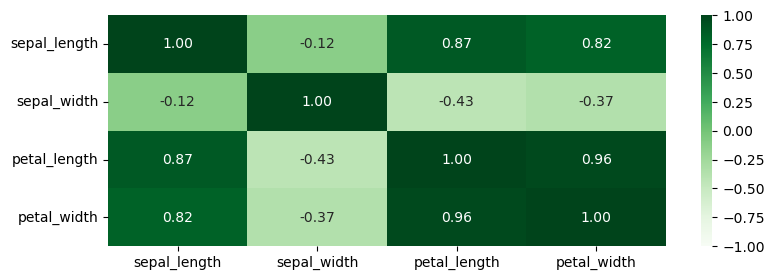

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(9,3))
sns.heatmap(X.corr(), vmin=-1, vmax=1, annot=True, fmt='.2f', cmap='Greens')
plt.show()